# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('HRV.csv')

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Dataset Preprocessing

In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

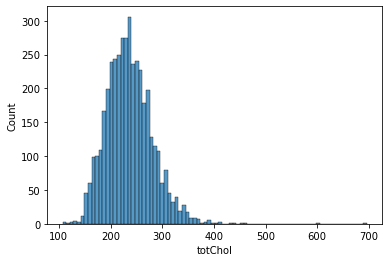

In [6]:
sns.histplot(dataset['totChol'])
plt.show()

In [7]:
totChol_median = dataset['totChol'].median()
dataset['totChol'].fillna(totChol_median, inplace = True)
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

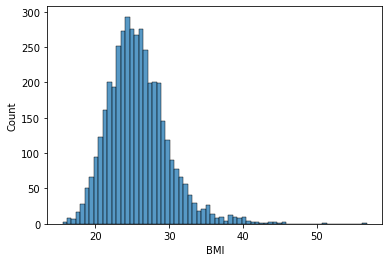

In [8]:
sns.histplot(dataset['BMI'])
plt.show()

In [9]:
bmi_median = dataset['BMI'].median()
dataset['BMI'].fillna(bmi_median, inplace = True)
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

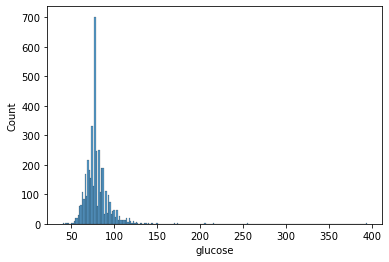

In [12]:
sns.histplot(dataset['glucose'])
plt.show()

In [10]:
glucose_median = dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median, inplace = True)
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        1
glucose          0
TenYearCHD       0
dtype: int64

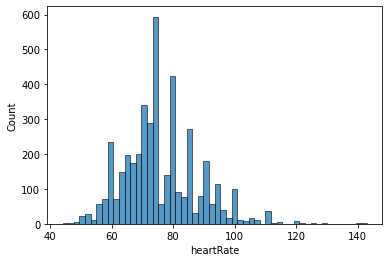

In [14]:
sns.histplot(dataset['heartRate'])
plt.show()

In [11]:
heartrate_median = dataset['heartRate'].median()
dataset['heartRate'].fillna(heartrate_median, inplace = True)
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [18]:
X = dataset.drop('TenYearCHD', axis = 1)
y = dataset[['TenYearCHD']]

In [19]:
X.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0


In [20]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Training the Logistic Regression model 

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

## Predicting a new result
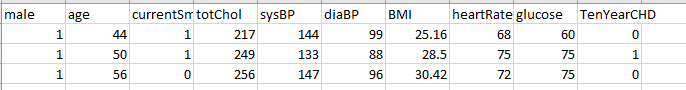

In [28]:
X_test.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose
1173,0,55,0,325.0,155.0,90.0,26.27,68.0,72.0
2236,1,46,0,270.0,138.0,97.0,33.79,90.0,65.0
1578,0,52,0,272.0,112.5,75.5,22.69,90.0,83.0
594,0,40,1,205.0,125.0,73.5,20.68,83.0,99.0
3076,0,63,0,289.0,158.0,80.0,32.66,75.0,84.0


In [25]:
# Predicting first row's TenYearCHD
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

[0]


In [26]:
# Predicting second row's TenYearCHD
print(classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))

[0]


In [27]:
# Predicting third row's TenYearCHD
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

[0]


### Confusion matrix, Confusion matrix display and classification report

In [29]:
y_pred = classifier.predict(X_test.values)

In [30]:
# Comparing y_test and y_pred
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[730   5]
 [108   4]]


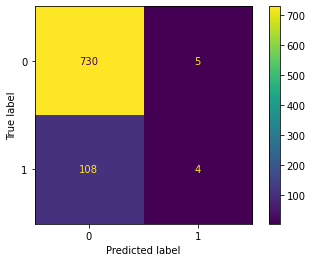

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

In [32]:
accuracy_score(y_test, y_pred)

0.8665879574970484

### Discuss the results


- True Negative (Actually no ten year risk CHD, predicted no ten year risk CHD) 730
- True Positive (Actually ten year risk CHD, predicted no ten year risk CHD) 4
- False Negative (Actually ten year risk CHD, predicted no ten year risk CHD) 108
- False Positive (Actual no ten year risk CHD, predicted ten year risk CHD) 5

### Summary

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       735
           1       0.44      0.04      0.07       112

    accuracy                           0.87       847
   macro avg       0.66      0.51      0.50       847
weighted avg       0.81      0.87      0.81       847



- 87% were correct positive predictions for no ten year risk CHD relative to total positive predictions.
- 44% were correct positive predictions for a ten year risk CHD relative to total positive predictions.

- 99% were correct positive predictions for no ten year risk CHD relative to total actual positives.
- 4% were correct positive predictions for a ten year risk CHD relative to total actual positives.

- 93% is close to 100%, meaning the model for predicting no ten year risk CHD is good.
- 7% is far from 100%, meaning the model for predicting a ten year risk CHS is bad.